In [42]:
import sys
import torch

sys.path.append('../external/power_spherical/')
from power_spherical import PowerSpherical, HypersphericalUniform

torch.Size([10000, 2])


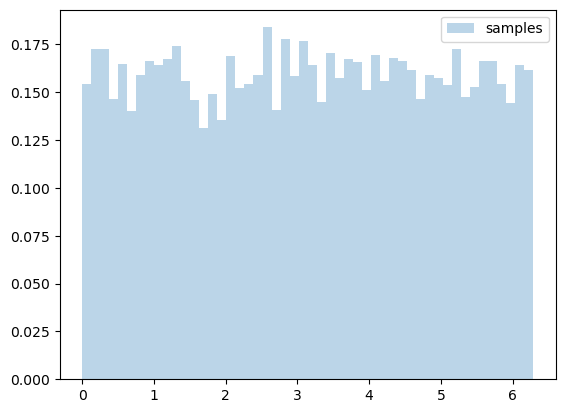

In [43]:
import matplotlib.pyplot as plt
import math

dist = HypersphericalUniform(2)

x = dist.sample((10000,))
print(x.shape)
plt.hist((lambda v: torch.where(v > 0, v, 2 * math.pi + v))(torch.atan2(x[:,1], x[:,0])),
         density=True, bins=50, alpha=.3, label='samples')

plt.legend()
plt.show()

torch.Size([10000, 2])


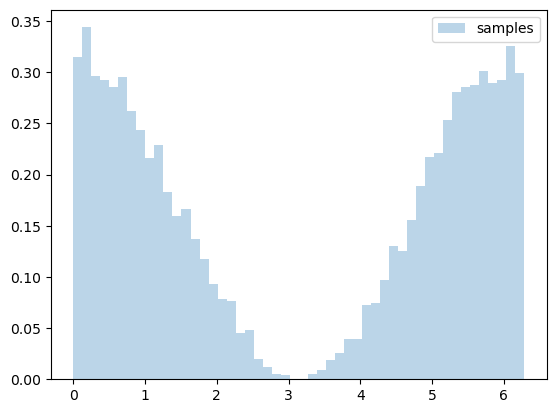

In [44]:
loc = torch.tensor([1.0, 0.0])
scale = torch.tensor([1.0])
dist = PowerSpherical(loc, scale)

x = dist.sample((10000,)).squeeze()
print(x.shape)
plt.hist((lambda v: torch.where(v > 0, v, 2 * math.pi + v))(torch.atan2(x[:,1], x[:,0])),
         density=True, bins=50, alpha=.3, label='samples')

plt.legend()
plt.show()

In [45]:
dim = 3
loc = torch.tensor([[0.8526, 0.5203, 0.0490], [1.0, 0.0, 0.0]])
print(loc)
scale = torch.tensor([1.0, 1.0])

dist1 = PowerSpherical(loc, scale)
dist2 = HypersphericalUniform(dim)

torch.distributions.kl_divergence(dist1, dist2)

tensor([[0.8526, 0.5203, 0.0490],
        [1.0000, 0.0000, 0.0000]])


tensor([0.1931, 0.1931])

In [79]:
torch.manual_seed(0)
loc = torch.randn(3, 2)
loc = torch.nn.functional.normalize(loc, p=2.0, dim=1)
scale = torch.tensor([[1.0], [1.0], [1.0]])
print('loc:')
print(loc.shape)
print(loc)
print('scale:')
print(scale.shape)
print(scale)
dist = PowerSpherical(loc, scale)

x = dist.sample()
print('sample:')
print(x.shape)
print(x)

loc:
torch.Size([3, 2])
tensor([[ 0.9823, -0.1871],
        [-0.9676,  0.2524],
        [-0.6128, -0.7902]])
scale:
torch.Size([3, 1])
tensor([[1.],
        [1.],
        [1.]])
sample:
torch.Size([3, 3, 2])
tensor([[[ 0.3507,  0.9365],
         [-0.4126, -0.9109],
         [ 0.6751, -0.7377]],

        [[ 0.6150,  0.7885],
         [-0.6664, -0.7456],
         [ 0.4232, -0.9060]],

        [[ 0.8944,  0.4472],
         [-0.9224, -0.3862],
         [-0.0078, -1.0000]]])


In [80]:
torch.manual_seed(0)
loc = torch.randn(3, 2)
loc = torch.nn.functional.normalize(loc, p=2.0, dim=1)
scale = torch.tensor([1.0, 1.0, 1.0])
print('loc:')
print(loc.shape)
print(loc)
print('scale:')
print(scale.shape)
print(scale)
dist = PowerSpherical(loc, scale)

x = dist.sample()
print('sample:')
print(x.shape)
print(x)

loc:
torch.Size([3, 2])
tensor([[ 0.9823, -0.1871],
        [-0.9676,  0.2524],
        [-0.6128, -0.7902]])
scale:
torch.Size([3])
tensor([1., 1., 1.])
sample:
torch.Size([3, 2])
tensor([[ 0.3507,  0.9365],
        [-0.6664, -0.7456],
        [-0.0078, -1.0000]])
